In [11]:
import numpy as np
import pandas as pd
import imageio 
from matplotlib import pylab as plt
import matplotlib.cm as cm


%matplotlib inline

### Load training data

(540, 2500) (540,)


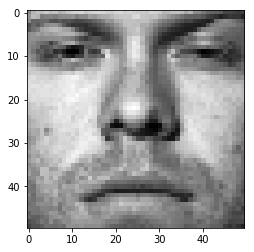

In [13]:
train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    line = line.strip().split()
    train_data.append(imageio.imread(line[0]).reshape(2500,))
    train_labels.append(line[1])

train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

print(train_data.shape, train_labels.shape)

plt.imshow(train_data[10, :].reshape(50,50), cmap=cm.Greys_r)

### Load test data

(100, 2500)


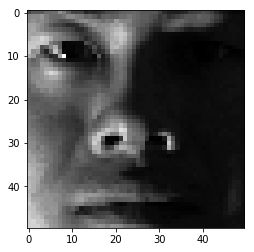

In [40]:
test_data = []
for line in open('./faces/test.txt'):
    line = line.strip().split()
    test_data.append(imageio.imread(line[0]).reshape(2500,))

test_data = np.array(test_data, dtype=float)

print(test_data.shape)

plt.imshow(test_data[10, :].reshape(50, 50), cmap=cm.Greys_r)

### Average face μ in training data

(2500,)
[59.25185185 56.10185185 52.42222222 ... 67.22222222 64.61851852
 59.27592593]


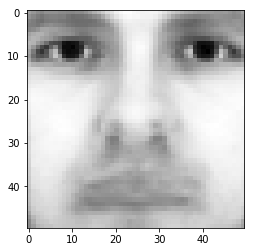

In [43]:
avg_train = np.average(train_data, axis=0)
print(avg_train.shape)
print(avg_train)
plt.imshow(avg_train.reshape(50, 50), cmap=cm.Greys_r)

### Substract μ for both training and test data

In [32]:
train_data_norm = train_data - avg_test
test_data_norm = test_data - avg_test

print((train_data_norm - train_data)[0])
print((test_data_norm - test_data)[0])

[-50.87 -50.06 -48.31 ... -79.32 -76.76 -69.23]
[-50.87 -50.06 -48.31 ... -79.32 -76.76 -69.23]


### Perform SVD on training set

u (540, 540)
s (540, 2500)
vh (2500, 2500)


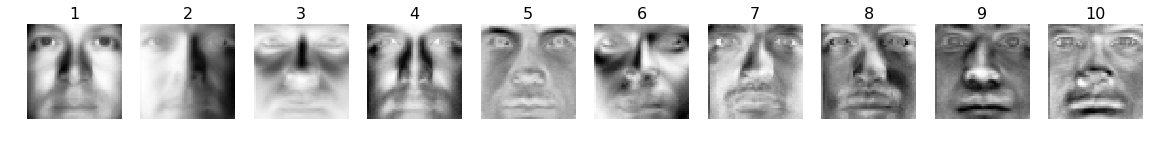

In [74]:
u, s, vh = np.linalg.svd(train_data_norm, full_matrices=True)
s = np.diag(s)
s.resize(train_data_norm.shape)
print("u", u.shape)
print("s", s.shape)
print("vh", vh.shape)

plt.gcf().set_size_inches(20, 20)
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(vh[i].reshape(50, 50), cmap=cm.Greys_r)
    plt.axis("off")
    plt.title(i + 1, fontsize=16)

### Low-rank Approximation

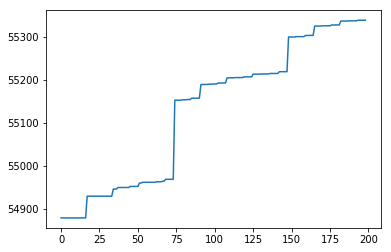

In [87]:
def low_rank_approx(u, s, vh, r):
    X_r = np.dot(np.dot(u[:, :r], s[:r, :r]), vh[:r, :])
    return np.linalg.norm(train_data_norm - X_r, ord='fro')
    
approx_err = []
for r in range(1, 200):
    approx_err.append(low_rank_approx(u, s, vh, r))
    
plt.plot(approx_err)

### Eigenface Feature